# FASTag Fraud Detection
This project focuses on detecting fraudulent transactions in Fastag systems using machine learning techniques. The analysis encompasses data preprocessing, exploratory data analysis (EDA), feature engineering, and model development to accurately identify fraudulent activities.

# Project Overview
The objective of this project is to develop a predictive model capable of distinguishing between legitimate and fraudulent Fastag transactions. By leveraging a labeled dataset, the project explores various data analysis and machine learning methodologies to enhance fraud detection capabilities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,  precision_score, recall_score, f1_score, confusion_matrix


1. EDA

In [2]:
df=pd.read_csv('FastagFraudDetection.csv')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
# Shape of data
df.shape

(5000, 13)

In [4]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
# Check the null values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# For numerical features
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [8]:

# Descirbe or get the statictistcal description for numerical+categoriecal features
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/24/2023 2:55,Bus,FTG-459-WSX-543,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA37AB3456,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017



Observation 1
1. Fastag ID has 549 Null values
2. No Duplicate Entries
3. Data types are almost correct

In [9]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [10]:
# Unique Values
print("Unique Vehicle Type: ", df['Vehicle_Type'].unique())
print("Unique TollBoothID : ", df['TollBoothID'].unique())
print("Unique Lane Type : ", df['Lane_Type'].unique())
print("Unique Vehicle Dimesnions : ", df['Vehicle_Dimensions'].unique())
print("Unique Fraud Indicator : ", df['Fraud_indicator'].unique())
print("Unique GeogrphicalLocation : ", df['Geographical_Location'].unique())

Unique Vehicle Type:  ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Unique TollBoothID :  ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Unique Lane Type :  ['Express' 'Regular']
Unique Vehicle Dimesnions :  ['Large' 'Small' 'Medium']
Unique Fraud Indicator :  ['Fraud' 'Not Fraud']
Unique GeogrphicalLocation :  ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


2. Data Visualisation

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


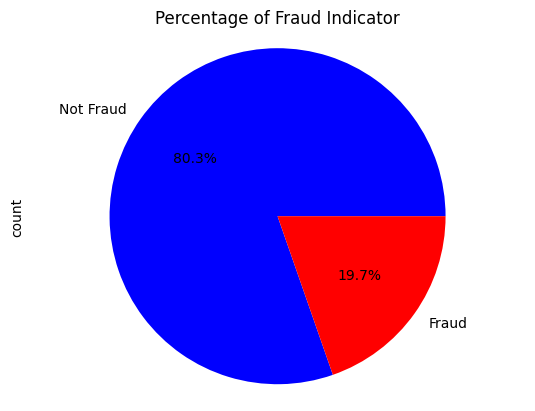

In [11]:
# Percentage of Fraud and Not Fraud
print(df['Fraud_indicator'].value_counts())

df['Fraud_indicator'].value_counts().plot(kind='pie', autopct = '%1.1f%%', colors=['Blue', 'Red'])
plt.title("Percentage of Fraud Indicator")
plt.axis('equal')
plt.show()

2.1 Analyse different Columns

In [12]:
# Analysis based on Vehicle Type

df['Vehicle_Type'].value_counts()

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64

Text(0.5, 1.0, 'Fraud Distribution using Vehicle Type')

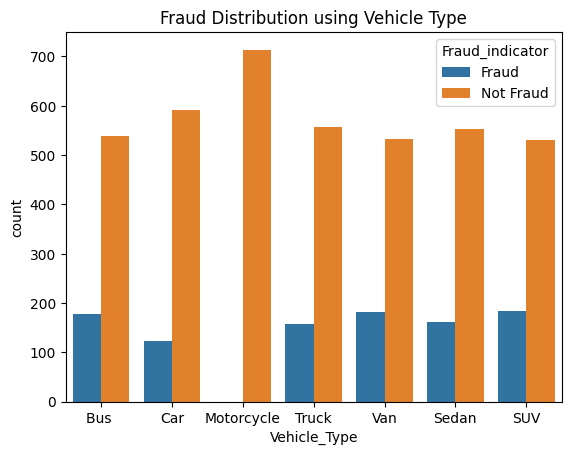

In [13]:
sns.countplot(x='Vehicle_Type',  data=df, hue='Fraud_indicator')
plt.title('Fraud Distribution using Vehicle Type')

Text(0.5, 1.0, 'Fraud Distribution using Vehicle Dimensions')

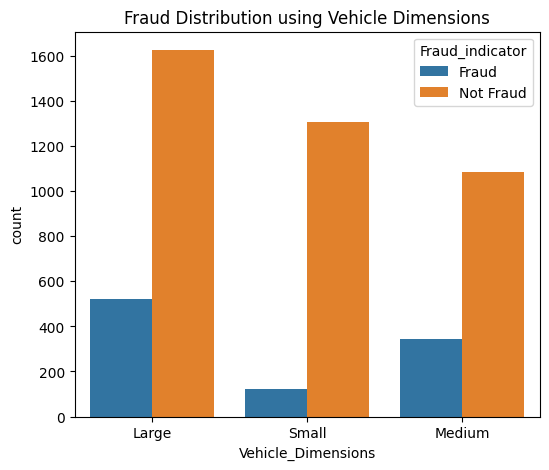

In [14]:
# Analysis based on Vehicle Dimensions

plt.figure(figsize=(6,5))
sns.countplot(x='Vehicle_Dimensions', data=df, hue='Fraud_indicator')
plt.title('Fraud Distribution using Vehicle Dimensions')

Text(0.5, 1.0, 'Fraud Distribution using TollBooths')

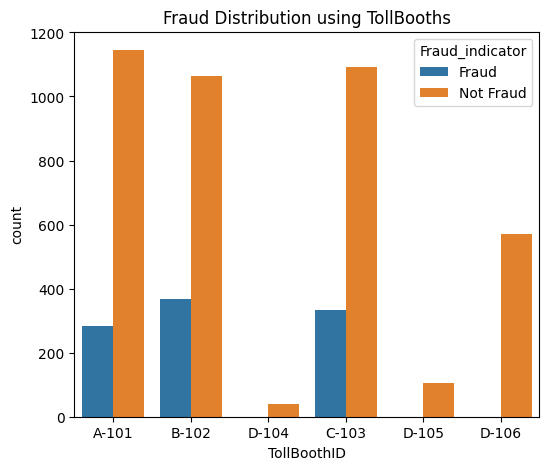

In [15]:
# Analysis based on TollBooths


plt.figure(figsize=(6,5))
sns.countplot(x='TollBoothID', data=df, hue='Fraud_indicator')
plt.title('Fraud Distribution using TollBooths')

Text(0.5, 1.0, 'Fraud Distribution using Lane Type')

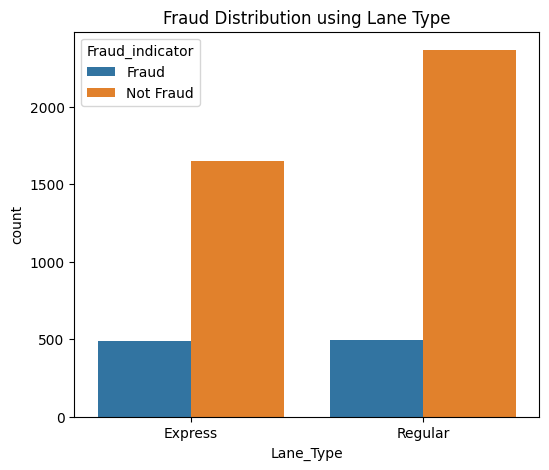

In [16]:
# Analysis based on Lane Type

plt.figure(figsize=(6,5))
sns.countplot(x='Lane_Type', data=df, hue='Fraud_indicator')
plt.title('Fraud Distribution using Lane Type')

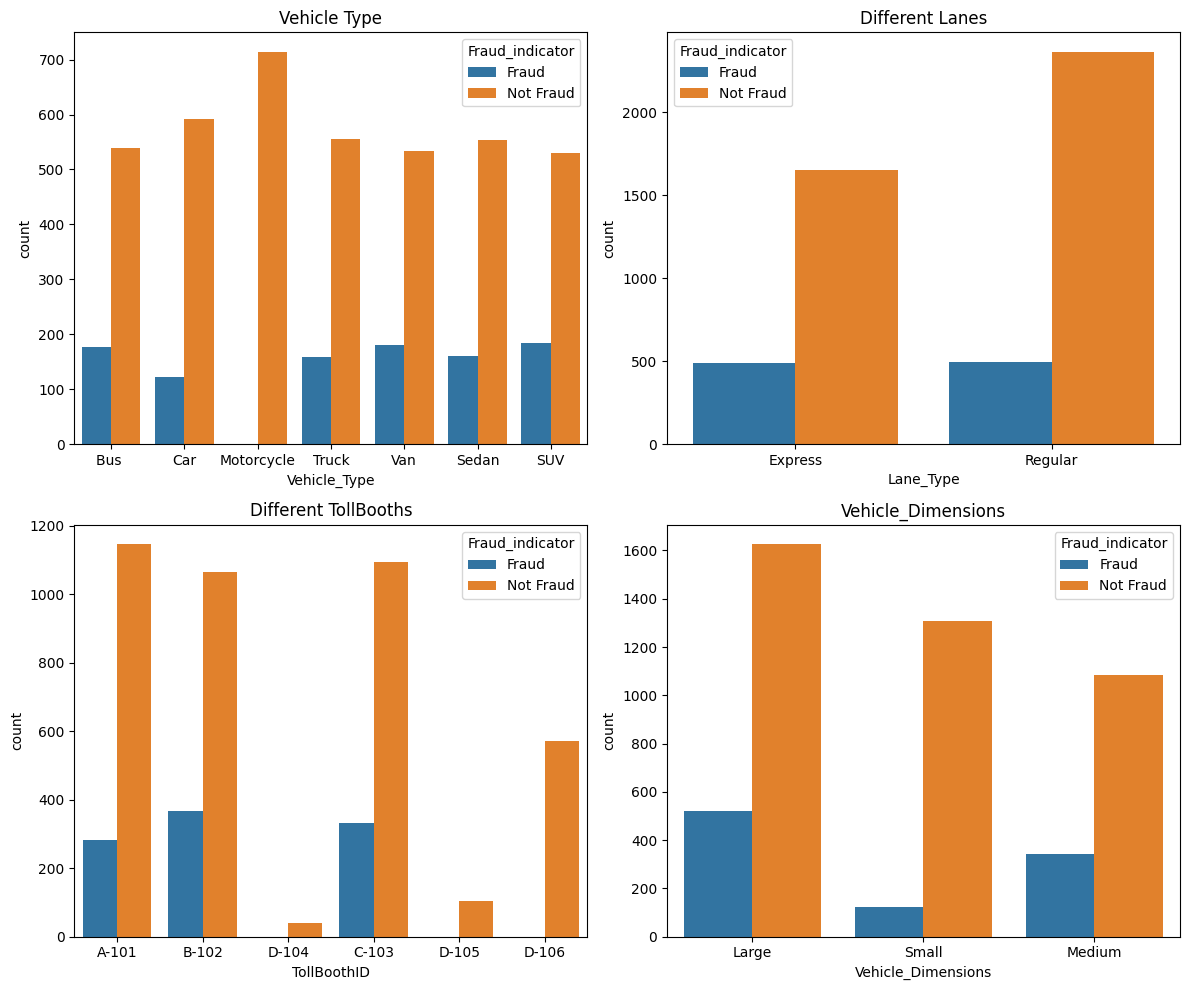

In [17]:
# Combining all graphs together

fig, axes = plt.subplots(2,2, figsize=(12,10))
# Vehicle Type
sns.countplot(x='Vehicle_Type',  data=df, hue='Fraud_indicator', ax=axes[0,0]).set_title('Vehicle Type')

#Lane Type
sns.countplot(x='Lane_Type', data=df, hue='Fraud_indicator', ax=axes[0,1]).set_title('Different Lanes')

#Different TollBooths
sns.countplot(x='TollBoothID', data=df, hue='Fraud_indicator', ax=axes[1,0]).set_title('Different TollBooths')


#Vehicle Dimensions
sns.countplot(x='Vehicle_Dimensions', data=df, hue='Fraud_indicator', ax=axes[1,1]).set_title('Vehicle_Dimensions')

plt.tight_layout()
plt.show()



Observation 2
1. Motorcycles are safe - not involved in any fraud.
2. Tollbooths 104, 105 and 106 have no fraud detected. But 101,102,103 have mix data.
3. Express way has higher fraud percentage based on vehicles than regular ways.
4. Very less small vehicles are involved in Fraud.

In [18]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

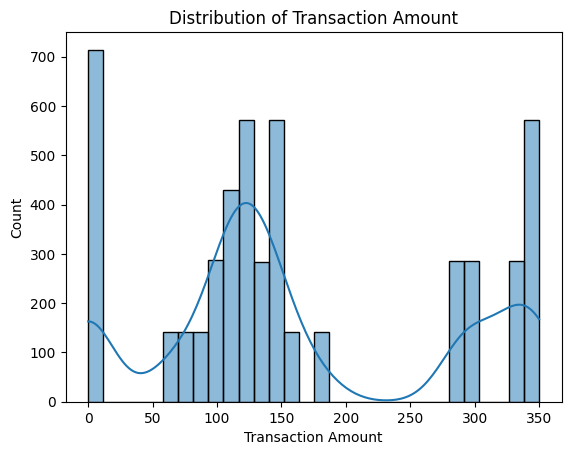

In [19]:
# Distribution of Transaction Amount

sns.histplot(df['Transaction_Amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

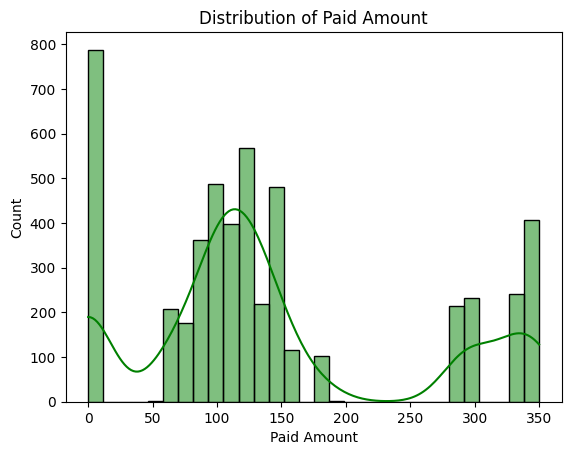

In [20]:
# Distribution of Paid Amount

sns.histplot(df['Amount_paid'], bins=30, kde=True, color='green', edgecolor='black')
plt.title("Distribution of Paid Amount")
plt.xlabel('Paid Amount')
plt.ylabel('Count')
plt.show()

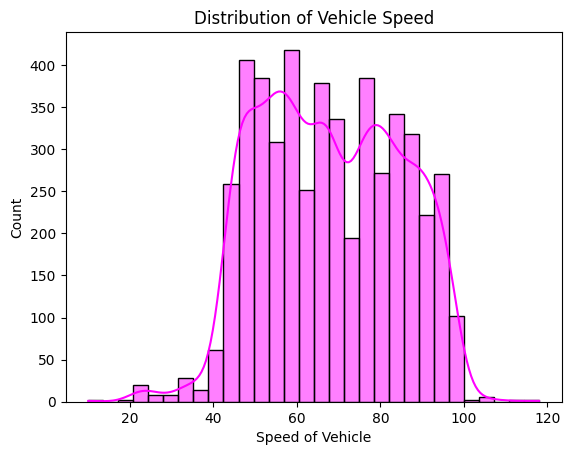

In [21]:
# Distibution of Vehicle Speed

sns.histplot(df['Vehicle_Speed'], bins=30, kde=True, color ='magenta',edgecolor= 'black')
plt.title("Distribution of Vehicle Speed")
plt.xlabel('Speed of Vehicle')
plt.ylabel ("Count")
plt.show()

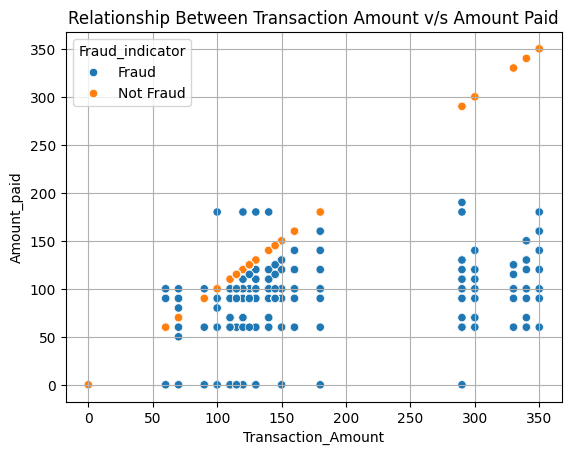

In [22]:
# Relationship between transaction amount and paid amount

sns.scatterplot(x='Transaction_Amount', y='Amount_paid', hue='Fraud_indicator', data=df)
plt.title('Relationship Between Transaction Amount v/s Amount Paid')
plt.grid(True)
plt.show()

Observation 3
1. When Transaction AMount is not equal to AMount Paid ==> Fraud
2. When Transcation AMount is equal to AMount Paid ==> Not Fraud

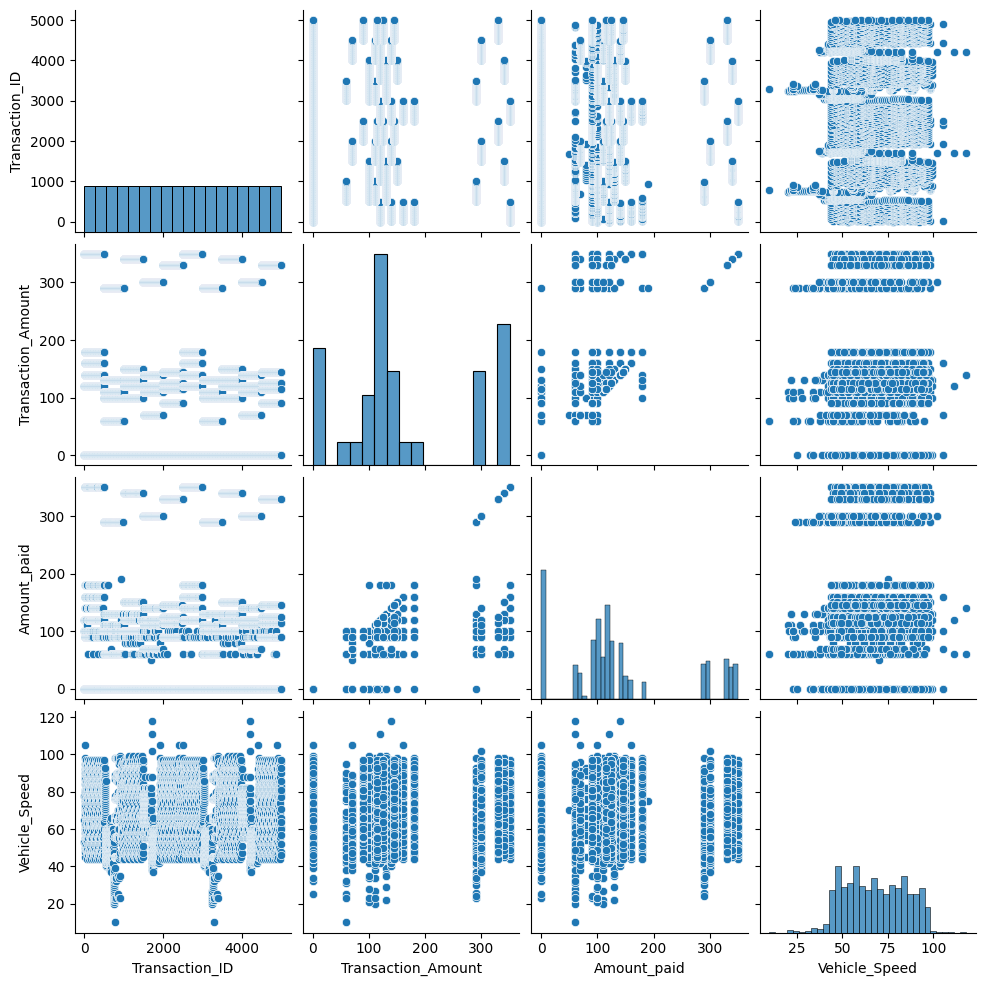

In [23]:
# Pair Plot
sns.pairplot(df)

3. Feature Extraction

In [24]:

df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [25]:
# State Code
df['State_code'] = df['Vehicle_Plate_Number'].str[:2]
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,State_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,KA


In [26]:
# Remove Vehicle Plate Number Column from dataset

df=df.drop('Vehicle_Plate_Number', axis=1)
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,State_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,KA


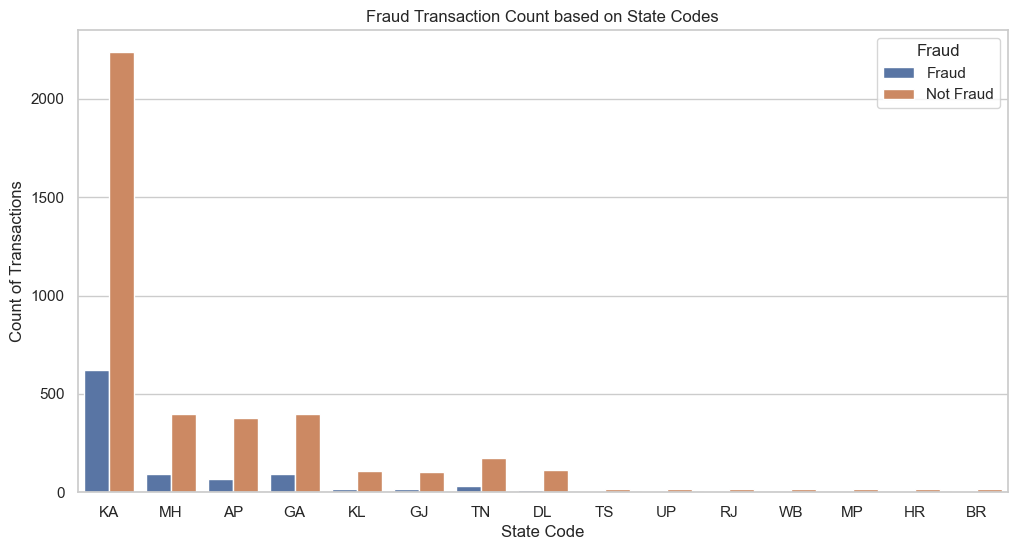

In [27]:
# Visualize Fraud Based on States

sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='State_code', data=df, hue='Fraud_indicator')
plt.title('Fraud Transaction Count based on State Codes')
plt.xlabel('State Code')
plt.ylabel('Count of Transactions')
plt.legend(title='Fraud')
plt.show()

In [28]:

df['State_code'].value_counts()

State_code
KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: count, dtype: int64

In [29]:
df.loc[df['Fraud_indicator']=='Fraud', 'State_code'].value_counts()

State_code
KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: count, dtype: int64

Observation 4
1. Highest Fraud count is in Karnataka(KA)

In [30]:
# Analyse Timestamp to get the fraud /notfraud based on days
df['Timestamp']

0        1/6/2023 11:20
1        1/7/2023 14:55
2        1/8/2023 18:25
3         1/9/2023 2:05
4        1/10/2023 6:35
             ...       
4995     1/1/2023 22:18
4996    1/17/2023 13:43
4997      2/5/2023 5:08
4998    2/20/2023 20:34
4999     3/10/2023 0:59
Name: Timestamp, Length: 5000, dtype: object

In [31]:
#convert timestamp into dataframe
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [32]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

In [33]:
#drop time stamp feature
df = df.drop('Timestamp', axis=1)

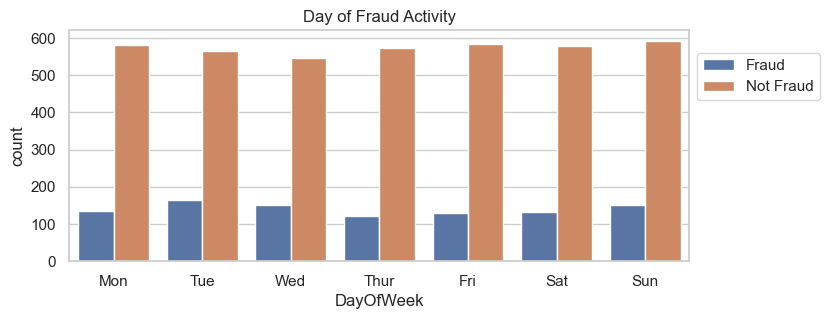

In [34]:
# Visualize Based on Days
plt.figure(figsize=(8,3))
sns.countplot(x='DayOfWeek', data=df, hue='Fraud_indicator')
plt.title('Day of Fraud Activity')
plt.legend(loc='center left', bbox_to_anchor=(1,0.8))
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thur','Fri','Sat','Sun'])
plt.show()

Correlation Matrix

In [35]:
# Correlation matrix for only numerical data
numericalDf=df.select_dtypes('number')

In [36]:
corr_matrix = numericalDf.corr()
corr_matrix

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,DayOfWeek,Month
Transaction_ID,1.000000,-0.023515,0.044433,0.014378,-0.023208,0.002446,0.260075
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229,-0.036980,-0.001813,-0.019824
Amount_paid,0.044433,0.870078,1.000000,0.039027,-0.026358,-0.002960,0.018105
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000,-0.002259,-0.017608,0.015349
Hour,-0.023208,-0.036980,-0.026358,-0.002259,1.000000,-0.010292,0.001041
DayOfWeek,0.002446,-0.001813,-0.002960,-0.017608,-0.010292,1.000000,0.002552
Month,0.260075,-0.019824,0.018105,0.015349,0.001041,0.002552,1.000000


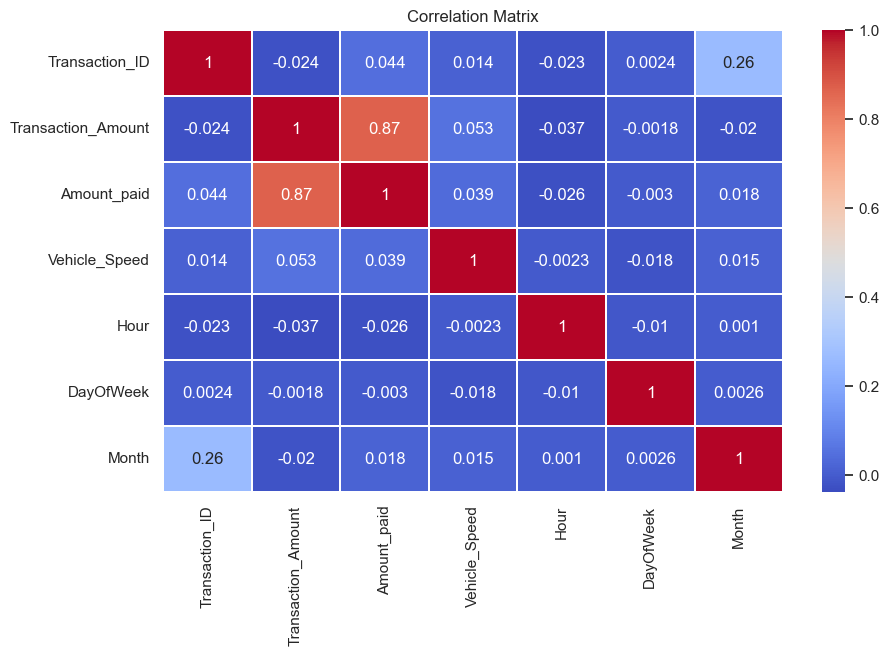

In [37]:
# Plot correlation Matrix

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.2)
plt.title("Correlation Matrix")
plt.show()

In [38]:
df.columns

Index(['Transaction_ID', 'Vehicle_Type', 'FastagID', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Fraud_indicator',
       'State_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [39]:
# Remove unecessary columns
# df = df.drop(['Transaction_ID','FastagID', 'Geographical_Location'], axis =1)


df.drop(['Transaction_ID','FastagID', 'Geographical_Location'], axis =1, inplace =True)

In [40]:
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,State_code,Hour,DayOfWeek,Month
0,Bus,A-101,Express,Large,350,120,65,Fraud,KA,11,4,1
1,Car,B-102,Regular,Small,120,100,78,Fraud,KA,14,5,1
2,Motorcycle,D-104,Regular,Small,0,0,53,Not Fraud,KA,18,6,1
3,Truck,C-103,Regular,Large,350,120,92,Fraud,KA,2,0,1
4,Van,B-102,Express,Medium,140,100,60,Fraud,KA,6,1,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Type        5000 non-null   object
 1   TollBoothID         5000 non-null   object
 2   Lane_Type           5000 non-null   object
 3   Vehicle_Dimensions  5000 non-null   object
 4   Transaction_Amount  5000 non-null   int64 
 5   Amount_paid         5000 non-null   int64 
 6   Vehicle_Speed       5000 non-null   int64 
 7   Fraud_indicator     5000 non-null   object
 8   State_code          5000 non-null   object
 9   Hour                5000 non-null   int32 
 10  DayOfWeek           5000 non-null   int32 
 11  Month               5000 non-null   int32 
dtypes: int32(3), int64(3), object(6)
memory usage: 410.3+ KB


In [42]:
# Label Encoding
le =LabelEncoder()

In [43]:
df.columns

Index(['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions',
       'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Fraud_indicator',
       'State_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [44]:
objectColumns = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions','TollBoothID','State_code', 'Fraud_indicator' ] #list of object columns
label_encoder = {}
for column in objectColumns:
    le=LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le

In [45]:
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,State_code,Hour,DayOfWeek,Month
0,0,0,0,0,350,120,65,0,6,11,4,1
1,1,1,1,2,120,100,78,0,6,14,5,1
2,2,3,1,2,0,0,53,1,6,18,6,1
3,5,2,1,0,350,120,92,0,6,2,0,1
4,6,1,0,1,140,100,60,0,6,6,1,1


In [46]:

label_encoder['Fraud_indicator'].classes_

array(['Fraud', 'Not Fraud'], dtype=object)

Model Training

In [47]:
X= df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

In [48]:
# SPlit the x and y in train and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (4000, 11)
X_test:  (1000, 11)
y_train:  (4000,)
y_test:  (1000,)


Logistic Regression Model

In [50]:
lr_model = LogisticRegression()
lr_model

LogisticRegression()

In [51]:
# fit the model
lr_model.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
#predict
y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

Model Evaluation

In [53]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision=precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


print("LR model results: \n")
print("Accuracy: ", accuracy)
print("\nConfusion Matrix\n", conf_matrix)
print("\nPrecision : ", precision)
print("\nRECALL: ", recall)
print("\nF1 Score: ", f1)

LR model results: 

Accuracy:  0.984

Confusion Matrix
 [[201  16]
 [  0 783]]

Precision :  0.9799749687108886

RECALL:  1.0

F1 Score:  0.9898862199747156


In [54]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       217
           1       0.98      1.00      0.99       783

    accuracy                           0.98      1000
   macro avg       0.99      0.96      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [55]:
#function to evaluate model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    precision=precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    
   
    print("Accuracy: ", accuracy)
    print("\nConfusion Matrix\n", conf_matrix)
    print("\nPrecision : ", precision)
    print("\nRECALL: ", recall)
    print("\nF1 Score: ", f1)

Decision Tree

In [56]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)


DecisionTreeClassifier()

In [57]:
y_tree_pred = tree_model.predict(X_test)
y_tree_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [58]:
# Accuacy of Decision Tree
print("Decision Tree Model evaluation: \n")
evaluate_model(y_test, y_tree_pred)

Decision Tree Model evaluation: 

Accuracy:  0.997

Confusion Matrix
 [[216   1]
 [  2 781]]

Precision :  0.9987212276214834

RECALL:  0.9974457215836526

F1 Score:  0.9980830670926517


Random Forest

In [59]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
rf_y_pred = rf_model.predict(X_test)
rf_y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [61]:
#accuracy 
print("Random Forest Model Evaluation: \n")
evaluate_model(y_test, rf_y_pred)

Random Forest Model Evaluation: 

Accuracy:  0.987

Confusion Matrix
 [[204  13]
 [  0 783]]

Precision :  0.9836683417085427

RECALL:  1.0

F1 Score:  0.9917669411019633


Support Vector Machine

In [62]:
svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC()

In [63]:
svc_y_pred = svc_model.predict(X_test)
svc_y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [64]:
#accuracry 
print("Support Vector Classifier Model Evaluation: \n")
evaluate_model(y_test, svc_y_pred)

Support Vector Classifier Model Evaluation: 

Accuracy:  0.983

Confusion Matrix
 [[200  17]
 [  0 783]]

Precision :  0.97875

RECALL:  1.0

F1 Score:  0.9892608970309539


KNN

In [65]:
knnModel = KNeighborsClassifier(n_neighbors = 3)
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
knn_y_pred = knnModel.predict(X_test)
knn_y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [67]:
#accuracy
print("KNN Classifier Model Evaluation: \n")
evaluate_model(y_test, knn_y_pred)

KNN Classifier Model Evaluation: 

Accuracy:  0.992

Confusion Matrix
 [[209   8]
 [  0 783]]

Precision :  0.9898862199747156

RECALL:  1.0

F1 Score:  0.9949174078780177


Text(0.5, 1.0, 'COmparison of Accuracy Scores of different models')

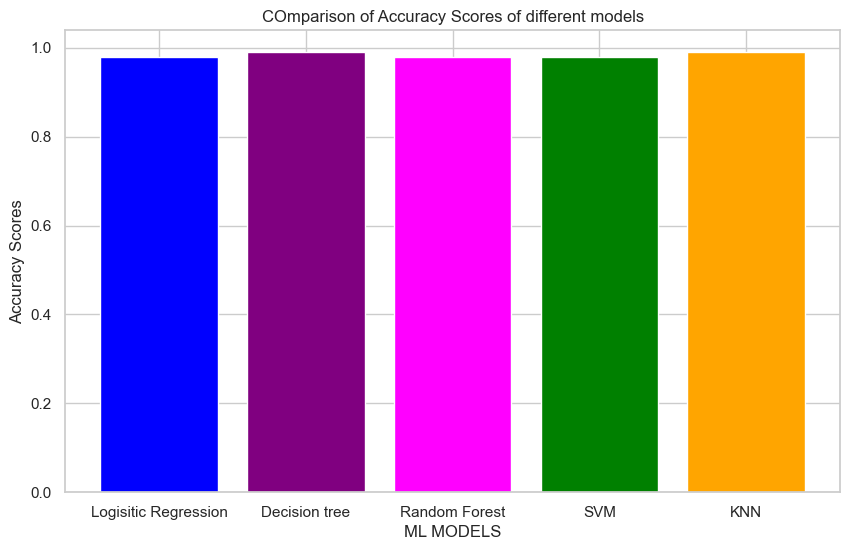

In [73]:
# Lets Visualize

models = ['Logisitic Regression', 'Decision tree', 'Random Forest', 'SVM', 'KNN']
accuarcy_scores= [ 0.98,0.99,0.98, 0.98, 0.99]
colors = ['blue', 'purple', 'magenta', 'green','orange']
plt.figure(figsize=(10,6))

plt.bar(models, accuarcy_scores, color = colors)
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy Scores")
plt.title("COmparison of Accuracy Scores of different models")

Conclusion
1.Decision Tree and KNN
* highest accuracy (99%)
* overall top performing model